In [1]:
import ROOT

Welcome to JupyROOT 6.10/00


In [2]:
import ROOT.RooStats
import ROOT.RooFit


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
ROOT.RooFit

ROOT.RooFit

In [4]:
import matplotlib.pyplot as plt

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
x = np.linspace(100,700)

In [7]:
y = np.power(x,3)*np.exp(-x/80.)/10000.

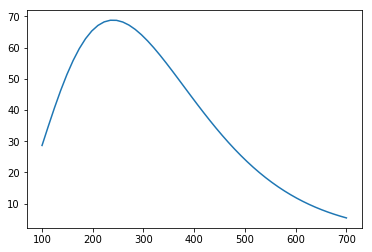

In [8]:
plt.plot(x,y)

In [9]:
x = ROOT.RooRealVar('x','x',100,700)
# x.setBinning(ROOT.RooBinning(21))
pdf = ROOT.RooGenericPdf('custom','custom','x^3*exp(-x/80.)',ROOT.RooArgList(x))

In [10]:
import ROOT

In [22]:
data = pdf.generate(ROOT.RooArgSet(x),1000)
x.setBinning(ROOT.RooBinning(21,100,700))

[#1] INFO:NumericIntegration -- RooRealIntegral::init(custom_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(custom_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


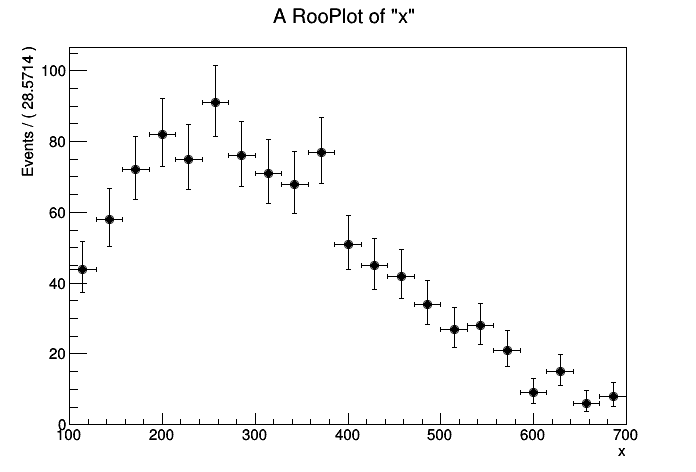

In [23]:
c = ROOT.TCanvas()
fr = x.frame()
data.plotOn(fr)
fr.Draw()
c.Draw()

[#1] INFO:NumericIntegration -- RooRealIntegral::init(custom_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


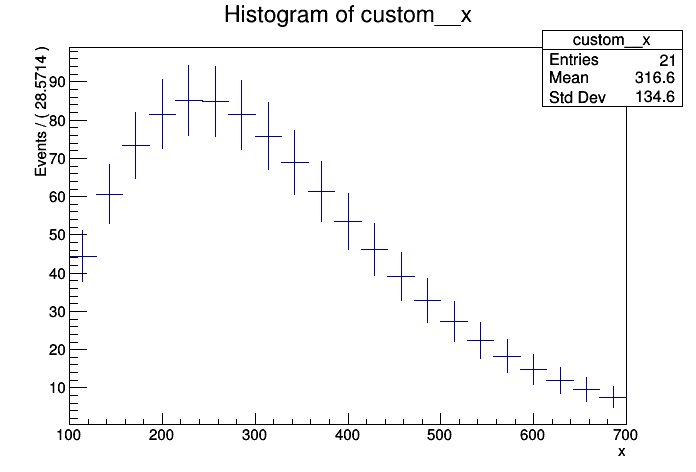

In [114]:
hsample = pdf.createHistogram('x',21)
hsample.Draw('E')
hsample.Scale(1000)
hsample.Sumw2(0)
c.Draw()

In [115]:
hdata = x.createHistogram('hist')
data.fillHistogram(hdata,ROOT.RooArgList(x))

<ROOT.TH1F object ("hist__x") at 0x7fea5e6c7c70>

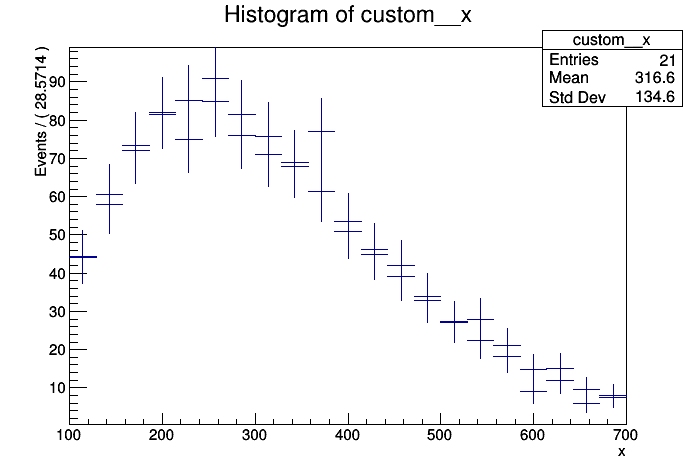

In [116]:
hsample.Draw('E')
# hsample.SetFillColor(ROOT.kRed)
hdata.Draw('Esame')
# hdata.SetLineColor(ROOT.kBlack)
# hdata.SetMarkerSize(200)
c.Draw()

In [117]:
hsample.SetName('control_region_background1')
hsample.SetTitle('control_region_background1')
hsample.Sumw2(0)
hdata.SetName('control_region_data')
hdata.SetTitle('control_region_data')

In [103]:
f = ROOT.TFile.Open('./data/input.root','update')

In [95]:
hsample.Write()

811

In [118]:
hdata.Write()

630

In [109]:
f.Close()

In [136]:
f = ROOT.TFile.Open('./data/input.root','update')

In [134]:
f.Delete('signal;1')

In [135]:
f.Close()

In [137]:
signal = ROOT.TH1F('signal','signal',25,200,600)

In [138]:
for x in  np.random.normal(loc = 350, scale = 15, size = 200):
    signal.Fill(x)

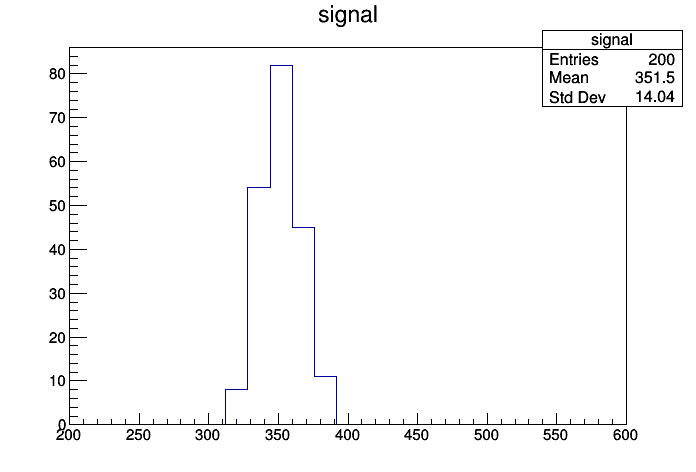

In [139]:
signal.Draw()
c.Draw()

In [140]:
signal.Write()

650

In [141]:
f.Close()